<a href="https://colab.research.google.com/github/yasiramri/capstone-ml/blob/alya/Copy_of_FinancyQ_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [ ]:
!pip install easyocr

  Using cached easyocr-1.7.1-py3-none-any.whl (2.9 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached pyclipper-1.3.0.post5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (908 kB)
  Using cached ninja-1.11.1.1-py2.py3-none-manylinux1_x86_64.manylinux_2_5_x86_64.whl (307 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl 

In [ ]:
!pip install pytesseract

In [ ]:
import easyocr
import cv2
import pytesseract
import random
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from pytesseract import Output
from PIL import Image

In [ ]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,643 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!tesseract --version

tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
import os
os.environ['PATH'] += ":/usr/bin/tesseract"

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="f77FoHccQ1RtNOK1tFRo")
project = rf.workspace("jakob-awn1e").project("receipt-or-invoice")
version = project.version(2)
dataset = version.download("folder")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Receipt-or-Invoice-2 in folder:: 100%|██████████| 4325/4325 [00:00<00:00, 4367.46it/s]


In [ ]:
# Preprocessing
def preprocess_images(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image) / 255.0  # Normalization
    return image

In [ ]:
def label_data(data_path):
    images = []
    labels = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Ensure processing only image files
                file_path = os.path.join(root, file)
                label = os.path.basename(os.path.dirname(file_path))  # Correct label extraction
                image = preprocess_images(file_path)
                images.append(image)
                labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load dataset
train_path = "/content/Receipt-or-Invoice-2/train"
val_path = "/content/Receipt-or-Invoice-2/valid"
test_path = "/content/Receipt-or-Invoice-2/test"

In [ ]:
X_train, y_train = label_data(train_path)
X_val, y_val = label_data(val_path)
X_test, y_test = label_data(test_path)

In [ ]:
import numpy as np
# Combining labels from all three datasets
all_labels = np.concatenate((y_train, y_val, y_test))

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)

# Re-encode labels for each dataset
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
_, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

Epoch 1/20
118/118 [==============================] - 6s 50ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 1.0179 - val_accuracy: 0.7639
Epoch 2/20
118/118 [==============================] - 5s 43ms/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.9050 - val_accuracy: 0.7889
Epoch 3/20
118/118 [==============================] - 5s 47ms/step - loss: 8.5294e-04 - accuracy: 1.0000 - val_loss: 1.1505 - val_accuracy: 0.7833
Epoch 4/20
118/118 [==============================] - 5s 44ms/step - loss: 1.9282e-04 - accuracy: 1.0000 - val_loss: 0.9615 - val_accuracy: 0.8083
Epoch 5/20
118/118 [==============================] - 6s 47ms/step - loss: 1.4662e-04 - accuracy: 1.0000 - val_loss: 1.0004 - val_accuracy: 0.7972
Epoch 6/20
118/118 [==============================] - 5s 43ms/step - loss: 1.0116e-04 - accuracy: 1.0000 - val_loss: 0.9680 - val_accuracy: 0.8167
Epoch 7/20
118/118 [==============================] - 5s 44ms/step - loss: 7.9225e-05 - accuracy: 1.0000 - val_loss: 0.9534 - 

In [ ]:
# Perform text recognition using OCR
def perform_ocr(image_path):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)
    return result

In [ ]:
# Perform text recognition using OCR with pytesseract
def perform_ocr_pytesseract(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img, lang='eng')
    return text

In [ ]:
# Integrate everything
def integrate_ocr_with_model(image_path):
    # Predict class using the CNN model
    image = preprocess_images(image_path)
    prediction = np.argmax(model.predict(np.array([image])))

    # Perform OCR on the image using easyocr
    ocr_result_easyocr = perform_ocr(image_path)

    # Perform OCR on the image using pytesseract
    ocr_result_pytesseract = perform_ocr_pytesseract(image_path)

    return label_encoder.classes_[prediction], ocr_result_easyocr, ocr_result_pytesseract

In [ ]:
def select_random_image(directory):
    all_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                all_files.append(os.path.join(root, file))
    random_image = random.choice(all_files)
    return random_image

1/1 [==============================] - 0s 20ms/step
Input Image: /content/Receipt-or-Invoice-2/test/receipt/geek79_jpg.rf.bfc303d8113d0ee8fb04e27a81d46b24.jpg
Predicted Class: receipt
OCR Result using EasyOCR:
Text: BILL TO:, Confidence: 0.9749125467613012
Text: Tax Invoice, Confidence: 0.723760726352688
Text: Trendy Outfits, Confidence: 0.8780413631914835
Text: Original For Recipient, Confidence: 0.7557584889733058
Text: Roorkee, Uttarakhand, 247667, Confidence: 0.919670229769034
Text: Place of Supply, Confidence: 0.6820999751916839
Text: 05 Uttarakhand, Confidence: 0.8654313735067362
Text: Purchase Order Number, Confidence: 0.9690053727420858
Text: Invoice Number, Confidence: 0.7368234903001655
Text: 571863457745, Confidence: 0.682205203126528
Text: dnrha23126217, Confidence: 0.7260450845143035
Text: SHIP TO:, Confidence: 0.6788696149139487
Text: Invoice Date, Confidence: 0.8885812618535334
Text: Order Date, Confidence: 0.742366880564516
Text: 03-06-2022 12.54.00, Confidence: 0.87629

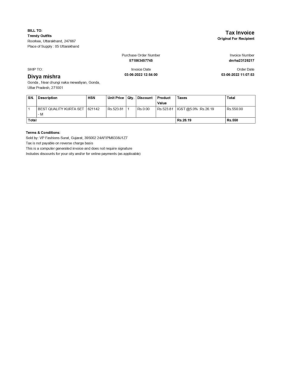

In [ ]:
# Select a random image from the test_path directory
random_image_path = select_random_image(test_path)

# Perform the OCR and classification
predicted_class, ocr_text_easyocr, ocr_text_pytesseract = integrate_ocr_with_model(random_image_path)

# Print the results
print(f"Input Image: {random_image_path}")
print(f"Predicted Class: {predicted_class}")
print("OCR Result using EasyOCR:")
for detection in ocr_text_easyocr:
    print(f"Text: {detection[1]}, Confidence: {detection[2]}")

# Display the image
img = Image.open(random_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(random_image_path)

extracted_text = ""
for detection in result:
    extracted_text += detection[1] + " "

print(extracted_text)

BILL TO: Tax Invoice Trendy Outfits Original For Recipient Roorkee, Uttarakhand, 247667 Place of Supply 05 Uttarakhand Purchase Order Number Invoice Number 571863457745 dnrha23126217 SHIP TO: Invoice Date Order Date 03-06-2022 12.54.00 03-06-2022 11:07:53 Divya mishra Gonda Near chungi naka mewatiyan, Gonda, Uttar Pradesh, 271001 SN: Description HSN Unit Price Qty_ Discount Product Taxes Total Value BEST QUALITY KURTA SET 621142 Rs.523.81 Rs.0.00 Rs.523.81 IGST @5.0%  Rs.26.19 Rs.550.00 Total Rs.26.19 Rs.550 Terms & Conditions: Sold by: VP Fashions Surat, Gujarat; 395002 24AFIPM6338J127 Tax is not payable on reverse charge basis This is a computer generated invoice and does not require signature Includes discounts for your city andlor for online payments (as applicable) 


In [ ]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique

In [ ]:
amounts = find_amounts(extracted_text)
amounts

[12.54, 523.81, 0.0, 26.19, 550.0]

In [ ]:
print(f"Total: {max(amounts)}")

Total: 550.0
